## Medical Insurance Prediction using Machine Learning

#### importing libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#regression models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import statsmodels.api as sm
#metrics
from sklearn import metrics

#crossval
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#dimension increasing
from sklearn.preprocessing import PolynomialFeatures


In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
for i in df.columns:
    print(i)
    print(df[i].unique())
    print('-----------------')

age
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
-----------------
sex
['female' 'male']
-----------------
bmi
[27.9   33.77  33.    22.705 28.88  25.74  33.44  27.74  29.83  25.84
 26.22  26.29  34.4   39.82  42.13  24.6   30.78  23.845 40.3   35.3
 36.005 32.4   34.1   31.92  28.025 27.72  23.085 32.775 17.385 36.3
 35.6   26.315 28.6   28.31  36.4   20.425 32.965 20.8   36.67  39.9
 26.6   36.63  21.78  30.8   37.05  37.3   38.665 34.77  24.53  35.2
 35.625 33.63  28.    34.43  28.69  36.955 31.825 31.68  22.88  37.335
 27.36  33.66  24.7   25.935 22.42  28.9   39.1   36.19  23.98  24.75
 28.5   28.1   32.01  27.4   34.01  29.59  35.53  39.805 26.885 38.285
 37.62  41.23  34.8   22.895 31.16  27.2   26.98  39.49  24.795 31.3
 38.28  19.95  19.3   31.6   25.46  30.115 29.92  27.5   28.4   30.875
 27.94  35.09  29.7   35.72  32.205 28.595 49.06  27.17  23.37  37.1
 23.75  28.975 31.35  3

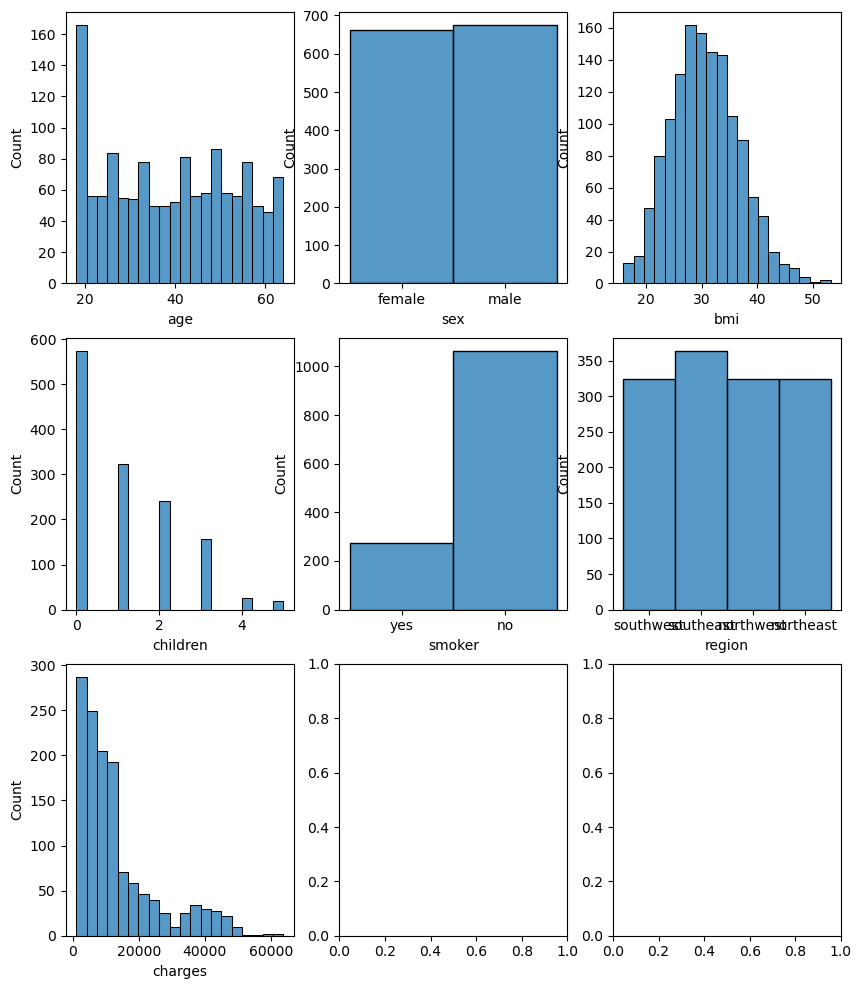

In [9]:
columns_to_plot=df.columns.tolist()
fi, axes=plt.subplots(3,3,figsize=(10,12))
axes=axes.flatten()
for i, j in enumerate(columns_to_plot):
     sns.histplot(df[j], bins=20,ax=axes[i])
plt.show()
    

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.shape

(1338, 7)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(1337, 7)

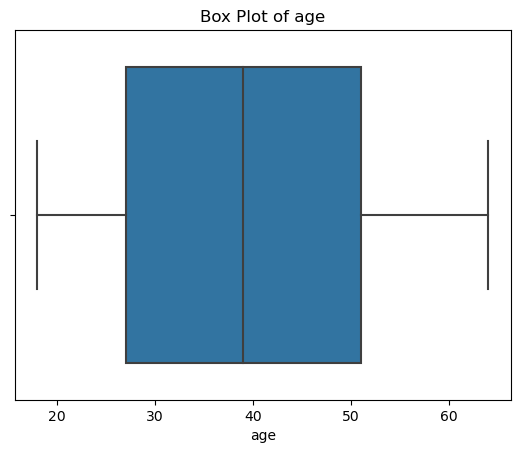

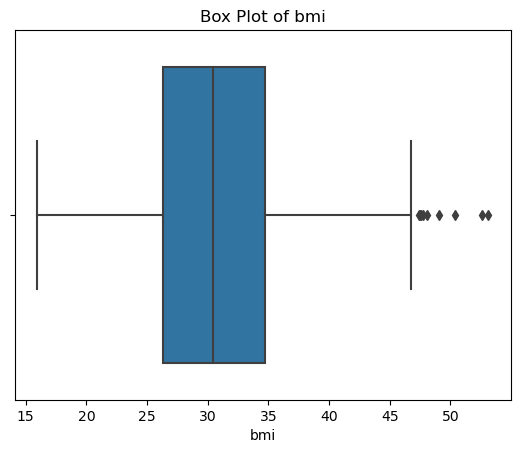

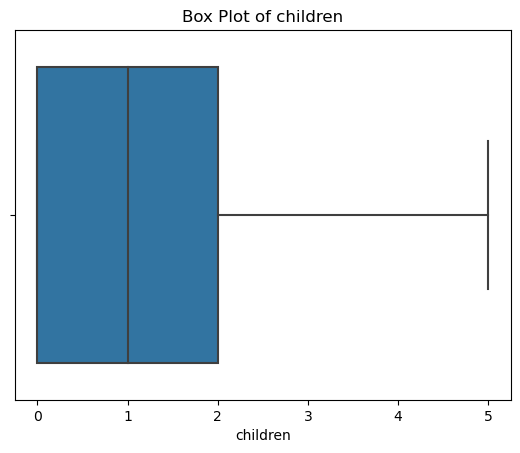

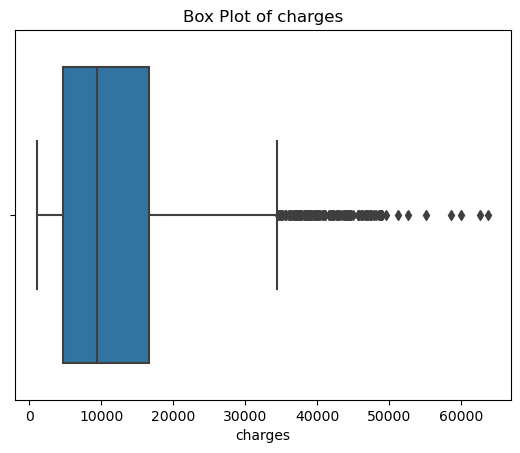

In [14]:
numeric_columns = df.select_dtypes(['int', 'float'])
for i in numeric_columns:
    
    sns.boxplot(df[i])
    plt.title(f"Box Plot of {i}")
    plt.show()

In [15]:
#capping outliers

In [16]:

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
Upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [17]:
Upper_limit

age            87.000000
bmi            47.315000
children        5.000000
charges     34524.777625
dtype: float64

In [18]:
lower_limit

age            -9.000000
bmi            13.675000
children       -3.000000
charges    -13120.716175
dtype: float64

In [19]:
df['bmi']= np.where(df['bmi'] <13.675000,13.675000 , np.where(df['bmi'] > 47.315000, 47.315000, df['bmi']))
df['charges']= np.where(df['charges'] <-13120.716175,-13120.716175, np.where(df['charges'] > 34524.777625, 34524.777625, df['charges']))


### Data Visualization

<AxesSubplot:xlabel='sex', ylabel='charges'>

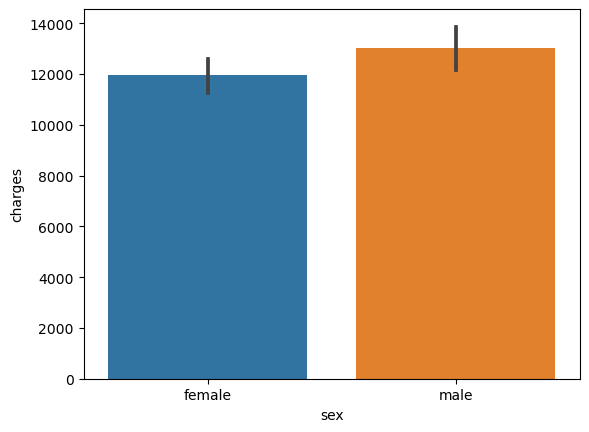

In [20]:
sns.barplot(x='sex', y='charges',data=df)

In [21]:
## Insurance chanrges are comparatively more for male than felmale

<AxesSubplot:xlabel='smoker', ylabel='charges'>

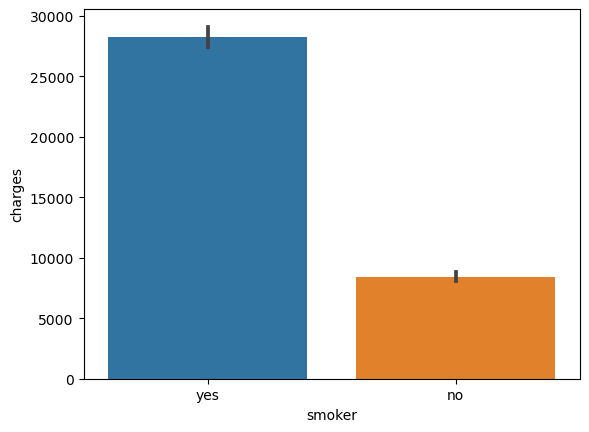

In [22]:
sns.barplot(x='smoker', y='charges',data=df)

In [23]:
### medical cost for smoker person are more than nonsmoker

<AxesSubplot:xlabel='region', ylabel='charges'>

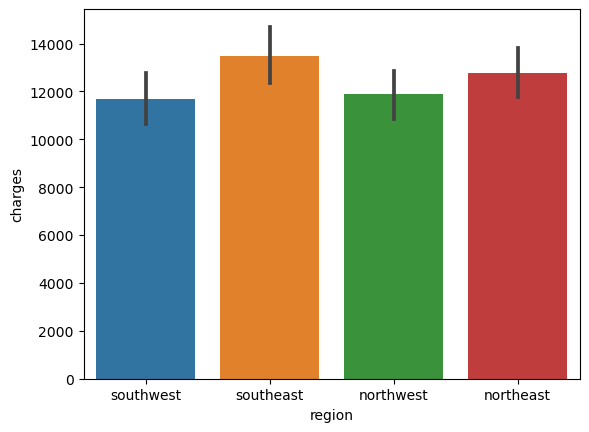

In [24]:
sns.barplot(x='region', y='charges',data=df)

In [25]:
# medical cost is higher for southeast followedby northeast.
# medical cost is almost similar for southwest followedby northwest.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '50'),
  Text(33, 0, '51'),
  Text(34, 0, '52'),
  Text(35, 0, '53'),
  Text(36, 0, '54'),
  Text(37, 0, '55')

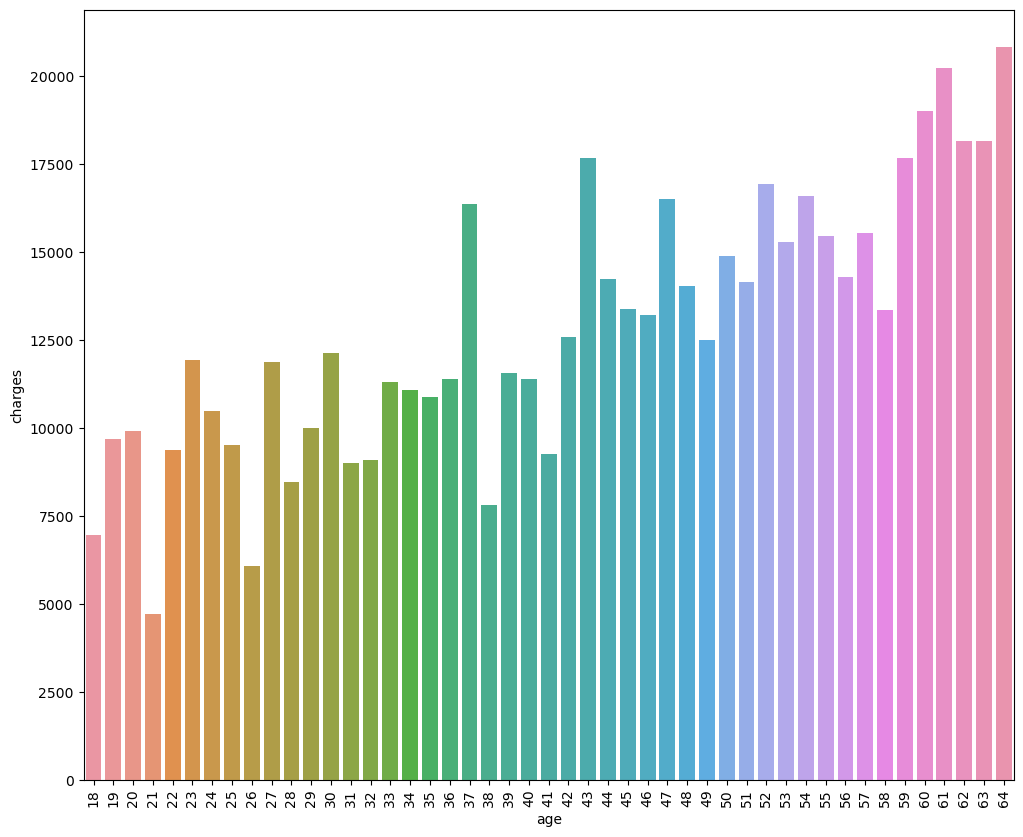

In [26]:
plt.figure(figsize=(12, 10))
sns.barplot(x='age', y='charges',data=df, ci=None)
plt.xticks(rotation=90)

In [27]:
# medical cost is comparatively higher for older and mid age people.

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.,
        35000., 40000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

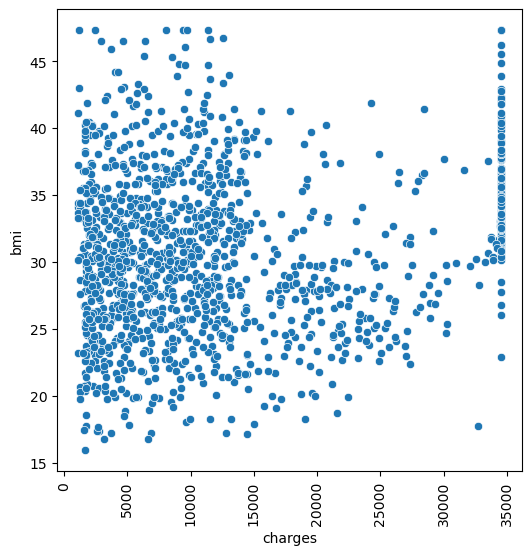

In [28]:
plt.figure(figsize=(6,6))
sns.scatterplot(y='bmi', x='charges',data=df, ci=None)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5')])

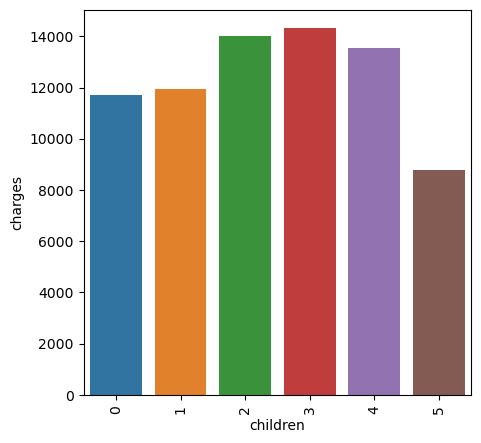

In [29]:
plt.figure(figsize=(5, 5))
sns.barplot(x='children', y='charges',data=df, ci=None)
plt.xticks(rotation=90)

In [30]:
# Having more children could potentially increase the frequency of healthcare visits for routine check-ups, vaccinations,
# maternity and childbirth costs increase medical expenses.

<AxesSubplot:>

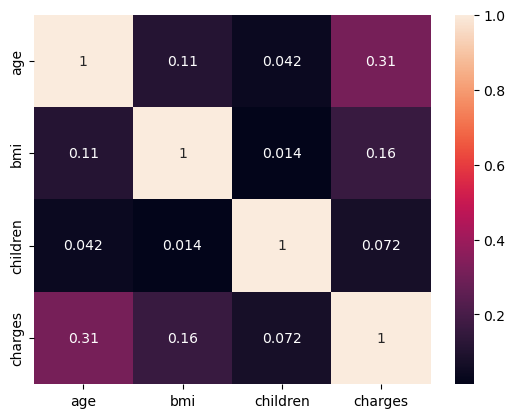

In [31]:
sns.heatmap(df.corr(), annot=True)

In [32]:
#  age and charges are having moderate linear realationship

### pie plot 

In [33]:
categorical_features = ['sex','children', 'smoker', 'region']

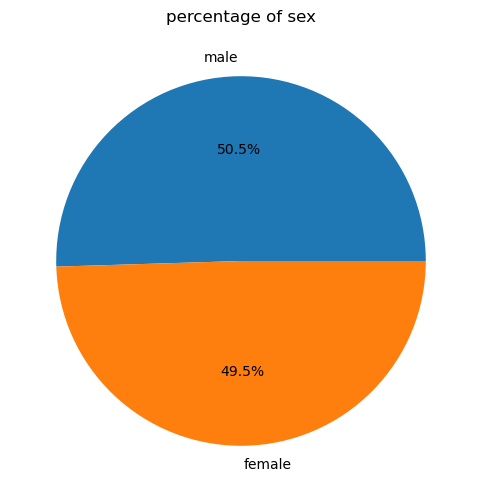

<Figure size 500x500 with 0 Axes>

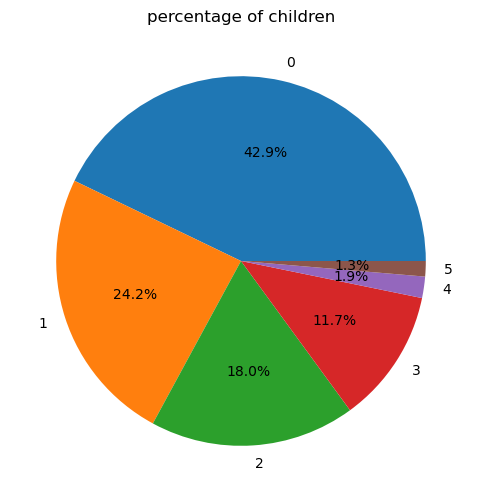

<Figure size 500x500 with 0 Axes>

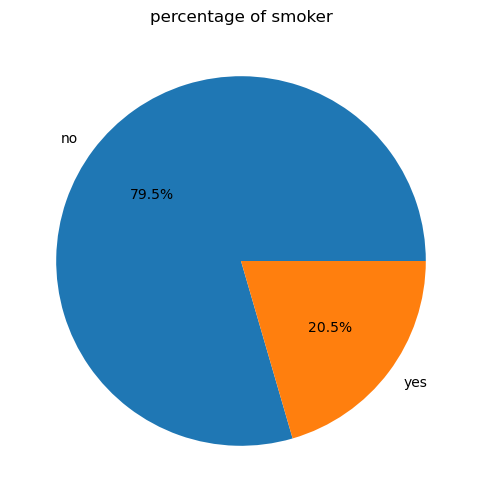

<Figure size 500x500 with 0 Axes>

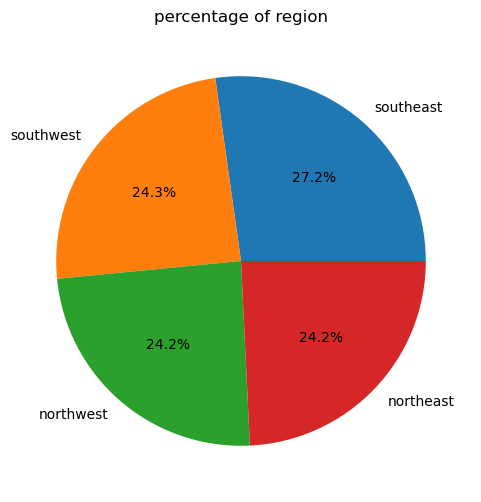

<Figure size 500x500 with 0 Axes>

In [37]:
for c in categorical_features :
    s = df[c].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(s, labels=s.index, autopct='%1.1f%%')
    plt.title(f'percentage of {c}')
    plt.show()
    plt.figure(figsize=(5, 5))

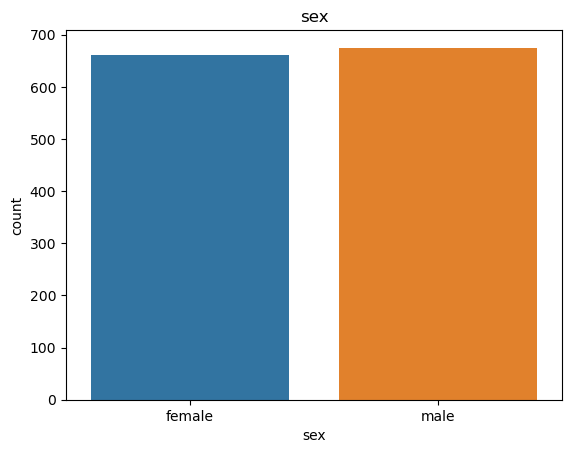

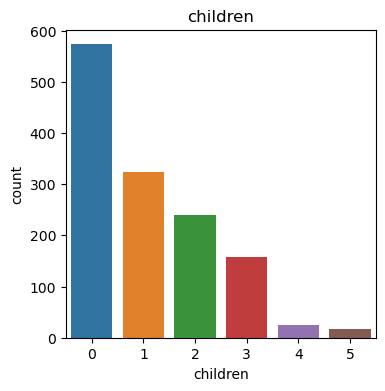

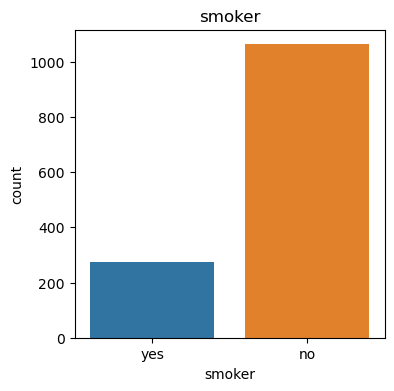

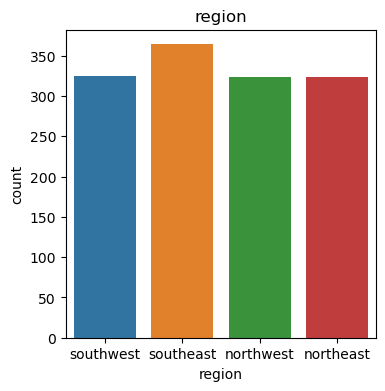

<Figure size 400x400 with 0 Axes>

In [39]:
for c in categorical_features :
    sns.countplot(data=df, x = df[c])
    plt.title(f"{c}")
    plt.show()
    plt.figure(figsize=(4, 4))
    

# data Modeling

#### converting categorical column into numerical  

In [40]:
categoricals = ['sex', 'smoker', 'region']
df1 = pd.get_dummies(df, columns=categoricals, drop_first=True)
df1

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   bmi               1337 non-null   float64
 2   children          1337 non-null   int64  
 3   charges           1337 non-null   float64
 4   sex_male          1337 non-null   uint8  
 5   smoker_yes        1337 non-null   uint8  
 6   region_northwest  1337 non-null   uint8  
 7   region_southeast  1337 non-null   uint8  
 8   region_southwest  1337 non-null   uint8  
dtypes: float64(2), int64(2), uint8(5)
memory usage: 58.8 KB


#### Data Splitting by train test split

In [42]:
x=df1.drop('charges',axis=1)
y=df1['charges']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((1069, 8), (268, 8))

#### Scaling 

In [44]:
scaler = StandardScaler()
scaler.fit(X_train)  
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

#### linear Regression 

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(scaled_X_train, y_train)

LinearRegression()

In [46]:
y_pred = lin_reg.predict(scaled_X_test)

In [47]:
linear_score = metrics.r2_score(y_test, y_pred)

In [48]:
linear_score

0.8210971615394598

In [49]:
def Evaluation(X_test, y_test, model) :
    y_pred = model.predict(X_test)    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    msqe = metrics.mean_squared_error(y_test, y_pred)
    r2_score = metrics.r2_score(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    n = len(y_test)  # Number of samples
    p = X_test.shape[1]  # Number of features
    adjusted_r2 = 1 - ((1 - r2_score) * (n - 1)) / (n - p - 1)
   
    print("mean_absolute_error : ", mae)
    print("mean_squared_error  : ", msqe)
    print("root_mean_absolute_error", rmse)
    print("R2_score            : ", r2_score)
    print("Adjusted R2_score   : ", adjusted_r2)

In [50]:
Evaluation(scaled_X_test, y_test, lin_reg)

mean_absolute_error :  3151.597029063196
mean_squared_error  :  20905443.470454153
root_mean_absolute_error 4572.247092016589
R2_score            :  0.8210971615394598
Adjusted R2_score   :  0.8155712051391342


In [51]:
Evaluation(scaled_X_train, y_train, lin_reg)

mean_absolute_error :  3429.641279877112
mean_squared_error  :  27396896.569976766
root_mean_absolute_error 5234.204483011412
R2_score            :  0.725349175386702
Adjusted R2_score   :  0.7232763389745261


### Cross Validation 

In [52]:
kfold=KFold(n_splits=10, shuffle= True)
result=cross_val_score(lin_reg, scaled_X_train, y_train, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.65403087 0.73423499 0.82348908 0.71769439 0.73798081 0.69238537
 0.65699772 0.72526334 0.73543772 0.71792115]
mean of all scores is :  0.7195435425754837


In [53]:
# ordinary lest square

In [54]:
X1 = sm.add_constant(x)
y1 = df1['charges']
model = sm.OLS(y1, X1).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     492.1
Date:                Fri, 18 Aug 2023   Prob (F-statistic):               0.00
Time:                        00:24:34   Log-Likelihood:                -13312.
No. Observations:                1337   AIC:                         2.664e+04
Df Residuals:                    1328   BIC:                         2.669e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -7174.3143    837.400  

### Lasso regression


In [55]:
lasso_cv = LassoCV(n_alphas=100, max_iter=1000, cv=10)
lasso_cv.fit(scaled_X_train, y_train)

LassoCV(cv=10)

In [56]:
lasso_cv.alpha_

38.36543250209706

In [57]:
Evaluation(scaled_X_test, y_test, lasso_cv)

mean_absolute_error :  3167.5087915710524
mean_squared_error  :  21141047.85447238
root_mean_absolute_error 4597.939522707142
R2_score            :  0.8190809262410228
Adjusted R2_score   :  0.8134926923025215


### Ridge Regression 

In [58]:
alpha = 10**np.linspace(10,-2,100)*0.5

In [59]:
ridge_cv = RidgeCV(alphas=alpha, scoring="neg_mean_squared_error", cv=10)
ridge_cv.fit(scaled_X_train, y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.06795364e+00, 2.32079442e+00, 1.75559587e+00, 1.32804389e+00,
       1.00461650e+00, 7.59955541e-01, 5.74878498e-01, 4.34874501e-01,
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=10, scoring='neg_mean_squared_error')

In [60]:
print( "alpha value : ", ridge_cv.alpha_) 

alpha value :  4.055654153948428


In [61]:
ridge_coef = ridge_cv.coef_
ridge_coef

array([3116.81879374, 1296.99603268,  552.15405332, -105.93701715,
       7836.28298586, -105.58094971, -308.8817698 , -229.20556264])

In [62]:
Evaluation(scaled_X_test, y_test, ridge_cv)

mean_absolute_error :  3163.920993353896
mean_squared_error  :  20962005.910858814
root_mean_absolute_error 4578.428323219532
R2_score            :  0.8206131162642207
Adjusted R2_score   :  0.8150722086584824


### Decision Tree

In [63]:
DTs_reg = DecisionTreeRegressor()
DTs_reg.fit(scaled_X_train, y_train)

DecisionTreeRegressor()

In [64]:
Evaluation(scaled_X_train, y_train, DTs_reg)

mean_absolute_error :  3.4712239319303527e-12
mean_squared_error  :  1.7293259189733495e-22
root_mean_absolute_error 1.3150383716733704e-11
R2_score            :  1.0
Adjusted R2_score   :  1.0


In [65]:
Evaluation(scaled_X_test, y_test, DTs_reg)

mean_absolute_error :  2353.2814900895587
mean_squared_error  :  30484686.61003991
root_mean_absolute_error 5521.293925343942
R2_score            :  0.7391207236610855
Adjusted R2_score   :  0.731062676515482


### Cross Validation

In [66]:
kfold = KFold(n_splits=10, shuffle=False)
result = cross_val_score(DTs_reg, x, y, cv=kfold)

print("score of each fold : ", result)
print("mean of all scores is : ", np.mean(result))

score of each fold :  [0.62307391 0.61388127 0.47766693 0.56632827 0.69092112 0.76897511
 0.63657617 0.59428252 0.45736256 0.71135581]
mean of all scores is :  0.614042365836044


In [69]:
criterion = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
splitter = ["best", "random"]
max_depth = range(3,21)
random_state =range(1,8)

params = {"splitter":splitter, "max_depth":max_depth, "random_state":random_state}

DTs_grid = GridSearchCV(DTs_reg, param_grid=params,
                         scoring = "neg_mean_squared_error",
                         cv = 5,
                         verbose = 1,
                         n_jobs = -1)

DTs_grid.fit(scaled_X_train, y_train)


print('best parameters:',DTs_grid.best_params_)
dT_model=DTs_grid.best_estimator_

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
best parameters: {'max_depth': 4, 'random_state': 3, 'splitter': 'best'}


In [70]:
Evaluation(scaled_X_train, y_train, dT_model)

mean_absolute_error :  2331.590246442288
mean_squared_error  :  18201884.544738557
root_mean_absolute_error 4266.366667873092
R2_score            :  0.8175281427602685
Adjusted R2_score   :  0.8161509966678931


In [71]:
Evaluation(scaled_X_test, y_test, dT_model)

mean_absolute_error :  2132.0997495916226
mean_squared_error  :  14535449.698323907
root_mean_absolute_error 3812.538484831846
R2_score            :  0.8756097562337883
Adjusted R2_score   :  0.8717675865421679
